In [ ]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import joblib # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.svm import SVC


In [ ]:



# Load and preprocess the data
x_train = pd.read_csv('x_train_openSmile_emobase.csv')
y_train = pd.read_csv('y_train_openSmile_emobase.csv')
x_test = pd.read_csv('x_test_openSmile_emobase.csv')
y_test = pd.read_csv('y_test_openSmile_emobase.csv')

y_test['emotion'] = np.where(y_test['emotion'] == 'happy', 1, 0)
y_train['emotion'] = np.where(y_train['emotion'] == 'happy', 1, 0)


In [ ]:

scorer = make_scorer(recall_score, pos_label=1)  # Focus on "happy" class

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
}

svc = SVC(random_state=42)

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring=make_scorer(recall_score, pos_label=1),
    cv=3,
    verbose=2
)

grid_search.fit(x_train, y_train['emotion'])

# Get the best model
model = grid_search.best_estimator_


Best parameters found:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

   not happy       0.89      0.89      0.89       530
       happy       0.47      0.47      0.47       107

    accuracy                           0.82       637
   macro avg       0.68      0.68      0.68       637
weighted avg       0.82      0.82      0.82       637



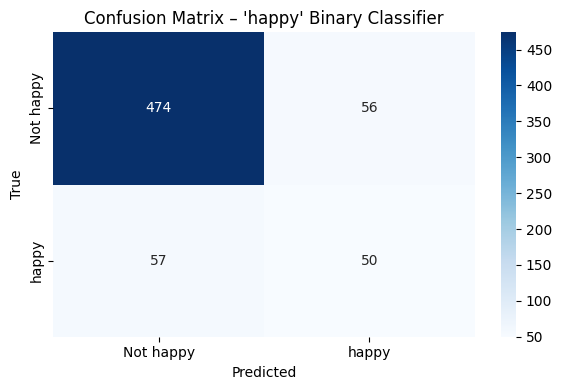

In [ ]:
# Get the best model
model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["not happy","happy"]))
cm = confusion_matrix(y_test['emotion'], y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=[f"Not {"happy"}", "happy"],
    yticklabels=[f"Not {"happy"}", "happy"]
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix – '{"happy"}' Binary Classifier")
plt.tight_layout()
plt.show()